Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline
from IPython.display import Image

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

In [5]:
# figure style
# ATTENTION: commentez l'option 'usetex' si elle ne marche pas; 
#            vous avez besoin de LaTeX pour l'utiliser
matplotlib.rcParams['text.usetex'] = True
#
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'normal'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['figure.figsize'] = (6.0,4.5)
matplotlib.rcParams['lines.linewidth'] = 0.5
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['ytick.right'] = True

# Amorce de glissement: décrochage d'une échelle

On étudie la chute d'une échelle; on calcule la condition de glissement au point de rotation.

L'échelle est de masse $m$ et longueur $l$; le moment d'inertie (par rapport à sa base en $O$) est
$$I = \frac{ml^2}{3}$$.
Le centre de masse est au milieu $l/2$

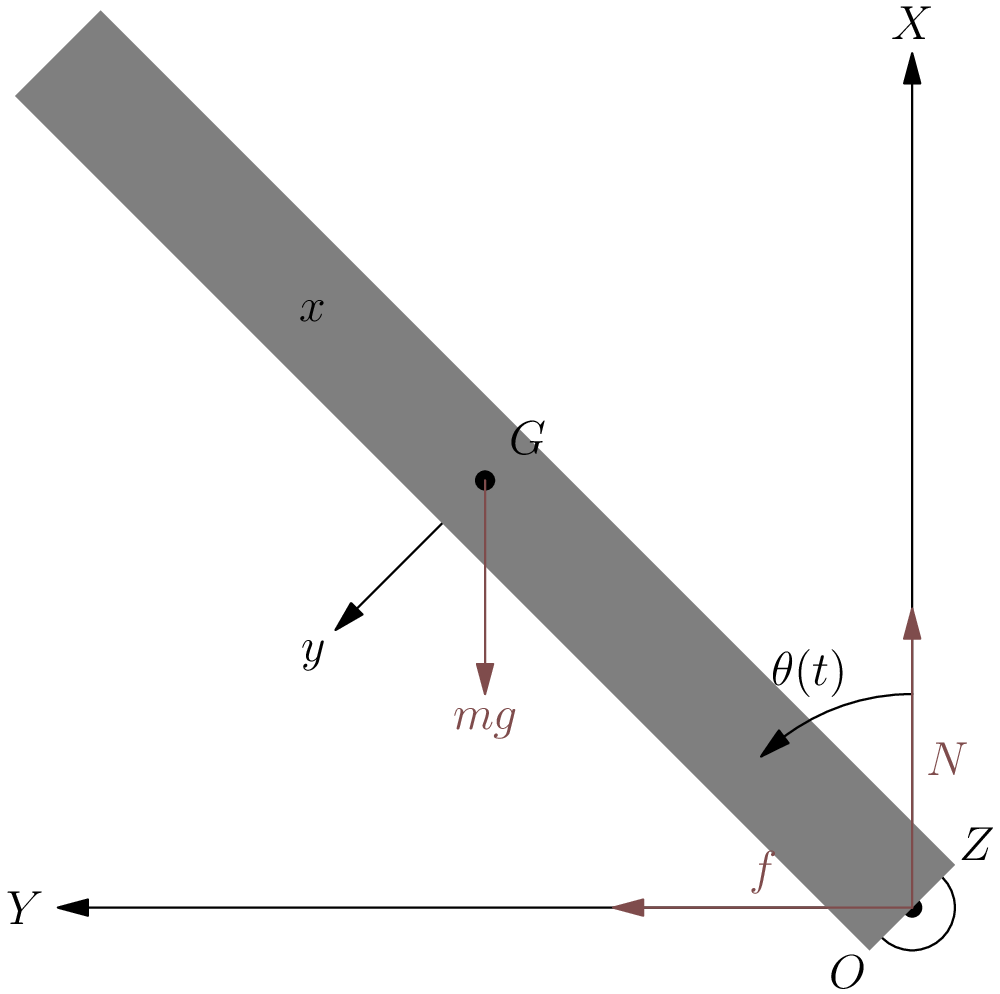

In [46]:
Image(filename='decrochage.png', width=250)

On a un repère $(X,Y,Z)$ au point $O$. L'échelle tourne autour de $O$ d'un angle $\theta(t)$, dépendent du temps.

Le repère mobile $(x,y,z)$ attaché à l'échelle, au centre de masse $G$ (sur lequel est appliqué le poids $mg$), est relié au repère fixe par un rotation:
$$\begin{Bmatrix}\hat{\bm x} \\ \hat{\bm y} \\ \hat{\bm z} \end{Bmatrix} = R_z(\theta)\begin{Bmatrix}\hat{\bm X} \\ \hat{\bm Y} \\ \hat{\bm Z} \end{Bmatrix}$$

Les coordonées du centre de masse sont
$$\bm G = \frac{l}{2}\big(\cos\theta \hat{\bm X} + \sin\theta \hat{\bm Y}\big) = \frac{l}{2} \hat{\bm x}$$
ce qui donne la vitesse
$$\dot{\bm G} = \frac{l \dot\theta}{2}\big(-\sin\theta \hat{\bm X} + \cos\theta \hat{\bm Y}\big) = \frac{l \dot\theta}{2} \hat{\bm y}$$
et l'accelération
\begin{align*}
\ddot{\bm G} &= -\frac{l}{2}\big(\ddot\theta \sin\theta + \dot\theta^2 \cos\theta \big) \hat{\bm X} + \frac{l}{2}\big(\ddot\theta \cos\theta - \dot\theta^2 \sin\theta \big)\hat{\bm Y} \\
&= \frac{l \ddot\theta}{2} \hat{\bm y}-\frac{l \dot\theta^2}{2} \hat{\bm x}
\end{align*}

### Moment cinétique

La vitesse angulaire du centre de masse, dans le repère mobile de centre $O$ est
$$\bm \omega = \dot{\theta} \hat{\bm z} = \dot{\theta} \hat{\bm Z}$$
(on note que la rotation ne change pas l'axe $Z$).

Le moment cinétique (par rapport à $O$) et le moment sont:
$$\bm L = I \bm \omega = I\dot{\theta} \hat{\bm Z}, \quad \frac{\D \bm L}{\D t} = I\ddot{\theta} \hat{\bm Z}$$
toujours au centre de masse. 

La variation du moment cinétique $\dot{\bm L}$, satisfait:
$$\dot{\bm L} = I\dot{\bm \omega} + \bm \omega \times I \bm \omega = \bm M_O$$
où $\bm M_O$ est le moment des forces (en $O$).

### Équations de mouvement

Le forces sont:

* le poids $-mg \hat{\bm X}$
* la force normale en $O$: $\bm N = N \hat{\bm X}$
* et la force de frottement statique: $\bm f = f \hat{\bm Y}$

L'équation de Newton est:
$$ m \ddot G = (N-mg) \hat{\bm X} + f \hat{\bm Y}$$
ou, en remplaçant l'accelération du centre de masse par son expression, on obtient
$$N = mg - \frac{ml}{2}\big(\ddot\theta \sin\theta + \dot\theta^2 \cos\theta \big)$$
et
$$f =  \frac{ml}{2}\big(\ddot\theta \cos\theta - \dot\theta^2 \sin\theta \big)$$

Le terme de rotation de l'équation d'Euler s'annule $\bm \omega\times I\bm\omega=0$, d'où:
$$I_G \dot{\bm \omega} = \bm G \times \big(-mg \hat{\bm X}\big)$$
pusique seule le poids exerce un moment par rapport à $O$:
$$\ddot{\theta} = \frac{3g}{2l} \sin\theta$$

## Frottement

Au point de contact de deux solides on a une force de réaction:
$$\bm R = \bm T + \bm N$$
qu'on décompose en partie tangentielle et normale à la surface de contact.

Frottement dynamique: la force s'oppose au mouvement tangentiel,
$$\bm T = - \mu_d N \hat{\bm v}_t$$
où $\hat{\bm v}_t$ est la direction du mouvement au point de contact, et $N$ est la grandeur de la force normale en ce point.

Frottement statique ($\bm V_t = 0$):
$$T = \mu_s N$$

Le frottement dynamique est plus petit que le frottement statique: $\mu_d < \mu_s$.

En utilisant les formules:

* $\ddot\theta = (3g/2l)\sin\theta$
* et $\dot\theta^2 = (3g/l)(1 - \cos\theta)$ (on suppose qu'on part du sommet à vitesse nulle)

pour exprimer les forces en fonction de l'angle, on obtient:
$$N = \frac{mg}{4}(3\cos\theta - 1)^2$$
et
$$f = \frac{3mg}{4} \sin\theta(3\cos\theta - 2)$$

### Condition de glissement

Le décrochage se produit au moment ou les forces $N$ et $f$ atteignent la limite du frottement statique $f = \mu N$:
$$\frac{3mg}{4} \sin\theta(3\cos\theta - 2) = \mu \frac{mg}{4}(3\cos\theta - 1)^2$$
ou
$$\sin\theta(3\cos\theta - 2)=\frac{\mu}{3}(3\cos\theta - 1)^2$$

On cherche d'abord une solution graphique. On choisit une valeur du coefficient de frottement $\mu \sim 0.1$.

In [24]:
# Graphe (on écrit theta = t)
mu = 0.1
t = np.linspace(0, np.pi/2, 129)
f = np.sin(t)*(3*np.cos(t) - 2)
N = (mu/3)*(3*np.cos(t) - 1)**2

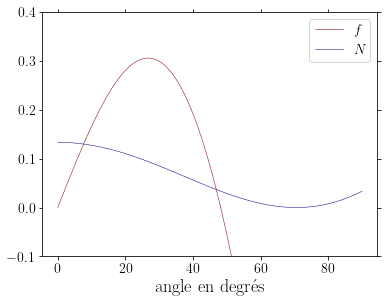

In [26]:
fig, ax = plt.subplots()
ax.plot(180*t/np.pi, f, color = '#800', label = r"$f$")
ax.plot(180*t/np.pi, N, color = '#008', label = r"$N$")
ax.set_xlabel('angle en degrés')
ax.set_ylim(-0.1,0.4)
ax.legend();

On calcule maintenant la valeur de $\theta$ numériquement

In [31]:
import scipy
from scipy.optimize import root_scalar

In [32]:
def fN(t):
    mu = 0.1
    f = np.sin(t)*(3*np.cos(t) - 2)
    N = (mu/3)*(3*np.cos(t) - 1)**2
    return f-N

In [42]:
sol = root_scalar(fN, x0 = 0.5, x1 = 1.3)
180*sol.root/np.pi

On trouve finalement que pour $\mu = 0.1$ l'angle de décrochage est de $\theta \approx 47^\circ$.

# Énergie cinétique

L'énergie cinétique de rotation est 
$$E_\omega = \frac{1}{2} \bm \omega I \bm \omega$$
avec $I$ calculé par rapport à l'axe de rotation $O$ du corps. Selon le problème il faut ajouter l'énergie cinétique de mouvement de centre de masse; ce n'est pas le cas présent.

En utilisant les calculs précédents de $\bm \omega$ et $I$ on obtient
$$E_\omega = \frac{ml^2}{6}\dot\theta^2$$

L'équation de conservation de l'énergie
$$\dot E_\omega = \bm F \cdot \bm v$$
où $\bm F$ sont les forces **conservatives** (ici la gravité), nous conduit à l'équation de mouvement de la barre:
$$\frac{ml^2}{3}\dot\theta \ddot\theta = \frac{mgl}{2}\sin\theta \dot \theta $$
pusique $\bm v = \dot{\bm G}$ (la composante $\hat{\bm Y}$ de $\bm v$ s'annule avec le produit scalaire, la force étant dans la direction $\hat{\bm X}$). On en déduit
$$\ddot\theta = \frac{3g}{2l} \sin \theta  $$
équation identique à celle d'Euler trouvée précédemment.

# Brouillon

In [ ]:
# font
# matplotlib.rcParams['font.serif'] = "STIX Two Text"
# matplotlib.rcParams['mathtext.fontset'] = 'stix'

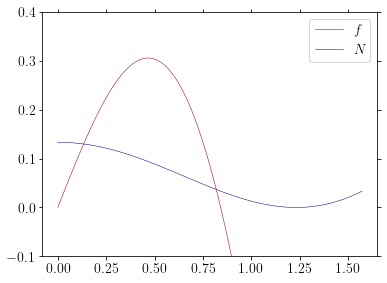

In [43]:
fig, ax = plt.subplots()
ax.plot(t, f, color = '#800', label = r"$f$")
ax.plot(t, N, color = '#008', label = r"$N$")
ax.set_ylim(-0.1,0.4)
ax.legend();